In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn import preprocessing, svm, metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('../data_feature/dataset_metrics.csv')
data

,filename,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,...,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,label
0,/training-d/d0001.wav,-591.75350,82.091070,67.843445,49.894085,33.601643,22.410803,16.887587,15.087091,14.140226,...,2.632784,2.559604,2.661890,2.653193,44.950066,28.459766,8.082388,57.222493,30.281057,1
1,/training-d/d0005.wav,-507.09525,67.730225,57.149704,44.678590,33.273678,25.339853,21.129091,19.163834,17.521276,...,3.176032,2.934937,3.054459,3.193361,50.408951,86.743325,9.888983,72.824097,150.780405,1
2,/training-d/d0006.wav,-545.63403,89.320910,65.648690,38.477776,17.254759,8.089881,10.203353,17.670960,23.343868,...,2.857877,2.068982,2.385970,2.887991,47.845277,77.096545,10.219800,53.633626,122.074088,1
3,/training-d/d0007.wav,-607.59064,91.373920,65.053825,34.857006,11.730544,2.085066,4.822889,13.126289,19.198210,...,5.465324,4.156095,3.817671,3.656302,222.266615,322.141297,2.561563,334.612020,415.251257,1
4,/training-d/d0013.wav,-544.76650,96.625725,76.556984,50.929790,27.650232,12.248447,6.014502,6.408118,9.213740,...,4.433519,3.627293,2.752674,2.413492,114.935788,47.487979,3.571830,230.734253,114.920731,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,/training-c/c0026.wav,-428.58817,102.994520,83.483580,58.944180,36.895410,22.302310,16.205944,16.087700,17.739510,...,4.404895,4.112625,3.938263,3.802121,67.251696,28.084677,2.978014,111.853027,59.601734,0
3236,/training-c/c0027.wav,-421.48254,85.190216,70.748300,52.903490,35.930805,23.636429,17.168913,15.146887,14.906868,...,3.716602,2.929726,2.771507,3.003178,67.046619,81.961862,10.263444,109.759521,158.757238,0
3237,/training-c/c0028.wav,-614.11597,82.512550,66.827520,47.552708,31.237417,21.875937,19.527122,21.099289,22.575205,...,3.572683,3.190578,3.572617,3.737370,54.462628,34.224511,3.193401,84.537760,69.201183,0
3238,/training-c/c0029.wav,-642.32104,77.797280,62.501420,44.933530,30.244774,22.130783,20.522167,22.560946,24.389542,...,3.896949,3.565084,3.561258,3.516206,47.239924,96.196586,10.342948,70.531209,190.141444,0


In [3]:
data['label'].value_counts()

1    2575
0     665
Name: label, dtype: int64

In [4]:
Y = data['label'].values
Y

array([1, 1, 1, ..., 0, 0, 0])

In [5]:
index = data.columns
index

Index(['filename', 'mfcc_mean1', 'mfcc_mean2', 'mfcc_mean3', 'mfcc_mean4',
       'mfcc_mean5', 'mfcc_mean6', 'mfcc_mean7', 'mfcc_mean8', 'mfcc_mean9',
       'mfcc_mean10', 'mfcc_mean11', 'mfcc_mean12', 'mfcc_mean13',
       'mfcc_mean14', 'mfcc_mean15', 'mfcc_mean16', 'mfcc_mean17',
       'mfcc_mean18', 'mfcc_mean19', 'mfcc_mean20', 'mfcc_std1', 'mfcc_std2',
       'mfcc_std3', 'mfcc_std4', 'mfcc_std5', 'mfcc_std6', 'mfcc_std7',
       'mfcc_std8', 'mfcc_std9', 'mfcc_std10', 'mfcc_std11', 'mfcc_std12',
       'mfcc_std13', 'mfcc_std14', 'mfcc_std15', 'mfcc_std16', 'mfcc_std17',
       'mfcc_std18', 'mfcc_std19', 'mfcc_std20', 'cent_mean', 'cent_std',
       'cent_skew', 'rolloff_mean', 'rolloff_std', 'label'],
      dtype='object')

In [6]:
X = data[index[1:-1]]
X

,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,...,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std
0,-591.75350,82.091070,67.843445,49.894085,33.601643,22.410803,16.887587,15.087091,14.140226,12.096580,...,2.573930,2.632784,2.559604,2.661890,2.653193,44.950066,28.459766,8.082388,57.222493,30.281057
1,-507.09525,67.730225,57.149704,44.678590,33.273678,25.339853,21.129091,19.163834,17.521276,14.956534,...,3.194003,3.176032,2.934937,3.054459,3.193361,50.408951,86.743325,9.888983,72.824097,150.780405
2,-545.63403,89.320910,65.648690,38.477776,17.254759,8.089881,10.203353,17.670960,23.343868,23.018225,...,3.013264,2.857877,2.068982,2.385970,2.887991,47.845277,77.096545,10.219800,53.633626,122.074088
3,-607.59064,91.373920,65.053825,34.857006,11.730544,2.085066,4.822889,13.126289,19.198210,18.733303,...,5.552763,5.465324,4.156095,3.817671,3.656302,222.266615,322.141297,2.561563,334.612020,415.251257
4,-544.76650,96.625725,76.556984,50.929790,27.650232,12.248447,6.014502,6.408118,9.213740,11.035639,...,4.305134,4.433519,3.627293,2.752674,2.413492,114.935788,47.487979,3.571830,230.734253,114.920731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-428.58817,102.994520,83.483580,58.944180,36.895410,22.302310,16.205944,16.087700,17.739510,17.716394,...,4.597452,4.404895,4.112625,3.938263,3.802121,67.251696,28.084677,2.978014,111.853027,59.601734
3236,-421.48254,85.190216,70.748300,52.903490,35.930805,23.636429,17.168913,15.146887,14.906868,14.006060,...,4.258563,3.716602,2.929726,2.771507,3.003178,67.046619,81.961862,10.263444,109.759521,158.757238
3237,-614.11597,82.512550,66.827520,47.552708,31.237417,21.875937,19.527122,21.099289,22.575205,21.311369,...,3.631171,3.572683,3.190578,3.572617,3.737370,54.462628,34.224511,3.193401,84.537760,69.201183
3238,-642.32104,77.797280,62.501420,44.933530,30.244774,22.130783,20.522167,22.560946,24.389542,23.403660,...,4.069523,3.896949,3.565084,3.561258,3.516206,47.239924,96.196586,10.342948,70.531209,190.141444


In [7]:
X = preprocessing.StandardScaler().fit(X).fit_transform(X)
X

array([[-1.67469524, -0.97216505, -0.75812012, ...,  0.67799882,
        -1.10948402, -1.40275274],
       [-0.45136294, -1.39653864, -1.32865474, ...,  1.16086265,
        -1.00828158,  0.01112465],
       [-1.00825768, -0.75851793, -0.87521513, ...,  1.24928307,
        -1.13276382, -0.32570052],
       ...,
       [-1.99783837, -0.95971   , -0.81232195, ..., -0.62872217,
        -0.93229892, -0.94608399],
       [-2.40540849, -1.09904972, -1.04312891, ...,  1.28219771,
        -1.02315478,  0.47296684],
       [-1.8328835 , -1.51819365, -1.47425919, ...,  1.17169786,
        -0.97530187, -0.63032134]])

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1234)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

Train set: (2592, 45) (2592,)
Test set: (648, 45) (648,)


In [53]:
print("Prediction:", y_predict[:35])
print("Real Value:", y_test[:35])

Prediction: [1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Real Value: [1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]


In [80]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.972608024691358
Test set Accuracy:  0.9305555555555556


In [81]:
print('CONFUSION_MATRIX :')
print(confusion_matrix(y_test, y_predict))
print()
print('REPORT')
print(classification_report(y_test, y_predict))

CONFUSION_MATRIX :
[[ 79  37]
 [  8 524]]

REPORT
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       116
           1       0.93      0.98      0.96       532

    accuracy                           0.93       648
   macro avg       0.92      0.83      0.87       648
weighted avg       0.93      0.93      0.93       648



Text(42.0, 0.5, 'Truth')

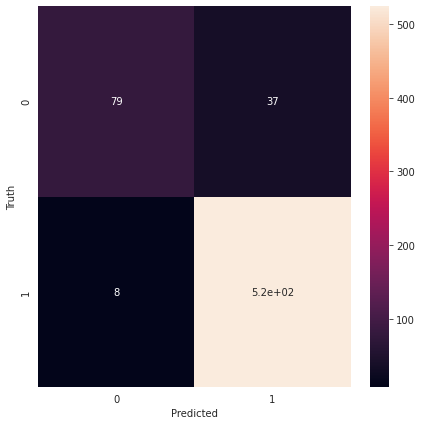

In [82]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(7,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:


# Подгонка гиперпараметров модели

In [ ]:
from sklearn.model_selection import GridSearchCV

# определение диапазона параметров
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)

# подгонка модели для поиска по сетке
grid.fit(X_train, y_train)

In [ ]:
# вывести лучший параметр после настройки
print(grid.best_params_)

# напечатать, как выглядит наша модель после настройки гиперпараметров
print(grid.best_estimator_)

In [50]:
grid_predictions = grid.predict(X_test)

# печать отчета о классификации
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       116
           1       0.93      0.98      0.96       532

    accuracy                           0.93       648
   macro avg       0.92      0.83      0.87       648
weighted avg       0.93      0.93      0.93       648



In [51]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, grid.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, grid_predictions))

Train set Accuracy:  0.972608024691358
Test set Accuracy:  0.9305555555555556
